In [ ]:
# LETS IMPORT THE SPOTIFY DATA

In [ ]:
import pandas as pd
df=pd.read_excel("Popular_Spotify_Songs.xlsx")


FILEPATH = 'Popular_Spotify_Songs.xlsx'
dataframes = pd.read_excel(FILEPATH, sheet_name=None)

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    object 
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
mask = df['streams'].astype(str).str.isnumeric()
df = df[mask].reset_index(drop=True)

df['streams'] = df['streams'].astype(int)


In [ ]:
df['target_in_spotify_charts'] = df['in_spotify_charts'] > 0
# above is for binary classification, like decision tree

In [ ]:
# MODEL 1 - REGRESSION OF DANCEABILITY

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# you may want to add more cols, just don't add the target
X = df[['released_year', 'released_month', 'released_day', 'bpm', 'energy_%', 'liveness_%']]

# any target that's not 1s and 0s but continous
y = df['danceability_%']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
y_test

199    57
420    81
694    68
750    89
507    76
       ..
33     64
31     56
711    59
299    73
616    80
Name: danceability_%, Length: 191, dtype: int64

In [ ]:
reg = LinearRegression()

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred

array([66.28779776, 72.05700246, 70.02784264, 63.49189974, 69.86541407,
       59.26914439, 66.7306661 , 63.84407376, 64.36012603, 68.67517002,
       64.56165735, 62.96744533, 65.08668896, 69.11058482, 72.28746329,
       64.46374883, 61.20067519, 61.69626843, 69.58744673, 63.00420028,
       65.84408668, 61.03485944, 53.48246447, 67.73289462, 68.92408978,
       73.37349391, 65.33903419, 66.66049521, 72.75839692, 71.39653749,
       63.81509484, 66.11501672, 65.51951184, 46.89839045, 56.07173197,
       64.17469564, 72.78822009, 64.38737525, 72.80761902, 70.83961248,
       72.3955143 , 72.66535131, 74.32535134, 62.76411175, 62.86869045,
       60.86809658, 65.44047253, 65.04921434, 70.30087806, 68.3706863 ,
       72.02221473, 66.32379394, 62.23944934, 67.61531312, 71.516003  ,
       65.6813345 , 69.84683587, 62.85763797, 76.63276599, 63.1102258 ,
       69.43154328, 69.19037507, 70.49894633, 69.45926773, 65.93384359,
       71.6029529 , 69.87907305, 72.4990011 , 60.45815611, 65.58

In [ ]:
import statsmodels.api as sm

new_reg = sm.OLS(y_train, X_train)
fitted_reg = new_reg.fit()

fitted_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         danceability_%   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              2866.
Date:                Tue, 07 May 2024   Prob (F-statistic):                        0.00
Time:                        01:36:18   Log-Likelihood:                         -3091.3
No. Observations:                 761   AIC:                                      6195.
Df Residuals:                     755   BIC:                                      6222.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
released_year      0.0334      0.002     20.450      0.000       0.030       0.037
released_month    -0.2398      0.147     -1.636      0.102      -0.528       0.048
released_day       0.0615      0.056      1.093      0.275      -0.049       0.172
bpm               -0.0872      0.018     -4.772      0.000      -0.123      -0.051
energy_%           0.1901      0.031      6.049      0.000       0.128       0.252
liveness_%        -0.0718      0.038     -1.896      0.058      -0.146       0.003
==============================================================================
Omnibus:                       16.873   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.375
Skew:                          -0.323   Prob(JB):                     0.000278
Kurtosis:                       2.684   Cond. No.                         581.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Let's test the accuracy of our predictions against Test

from sklearn.metrics import mean_absolute_error
y_true = y_test
y_pred = y_pred
mean_absolute_error(y_true, y_pred)

11.136293127916533

In [ ]:
# MODEL 2 - DECISION TREE

In [ ]:
# Display the names of the sheets and the first few rows of each dataframe
# dataframe_names = list(dataframes.keys())
# for name, df in dataframes.items():
#     print(f'Sheet name: {name}')
#     print(df.head())
#     print('\
# ')

In [ ]:
# Check the data type of 'in_spotify_charts' and convert it to boolean
# df = dataframes['Popular_Spotify_Songs']
# print('Data type of in_spotify_charts before conversion:', df['in_spotify_charts'].dtype)

# Convert 'in_spotify_charts' to boolean
df['in_spotify_charts'] = df['in_spotify_charts'].astype(bool)
print('Data type of in_spotify_charts after conversion:', df['in_spotify_charts'].dtype)

# Show the head of the dataframe to confirm changes
df.head()

Data type of in_spotify_charts after conversion: bool


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,target_in_spotify_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,True,141381703,43,...,B,Major,80,89,83,31,0,8,4,True
1,LALA,Myke Towers,1,2023,3,23,1474,True,133716286,48,...,C#,Major,71,61,74,7,0,10,4,True
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,True,140003974,94,...,F,Major,51,32,53,17,0,31,6,True
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,True,800840817,116,...,A,Major,55,58,72,11,0,11,15,True
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,True,303236322,84,...,A,Minor,65,23,80,14,63,11,6,True


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Selecting a few features for the decision tree
features = df[['streams', 'danceability_%', 'energy_%', 'acousticness_%']]
target = df['in_spotify_charts']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
X_train[~X_train['streams'].astype(str).str.isnumeric()]

,streams,danceability_%,energy_%,acousticness_%


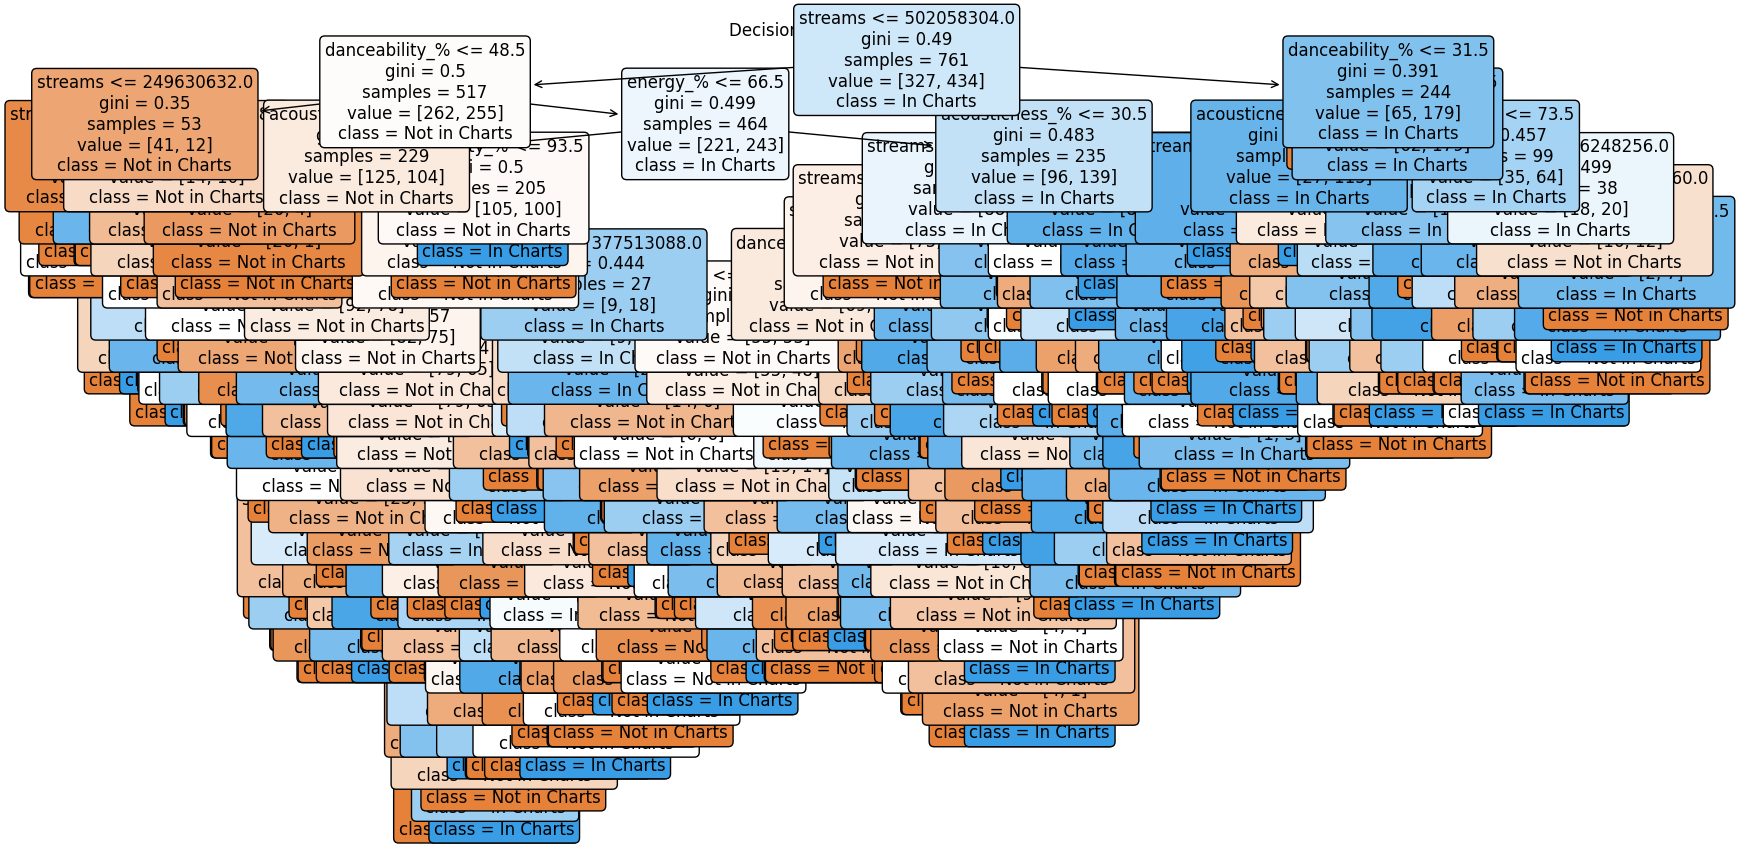

In [ ]:
#fit the decision tree model with the same features and target
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Plotting the decision tree
plt.figure(figsize=(20,10), facecolor='white')
tree.plot_tree(decision_tree, filled=True, feature_names=features.columns, class_names=['Not in Charts', 'In Charts'], rounded=True, fontsize=12)
plt.title('Decision Tree for In Spotify Charts')
plt.show()

In [ ]:
#TUNING THE DATA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score

# Let's make a reusable function to assess accuracy
def get_accuracy(y_pred):
  acc_score = str(round(accuracy_score(y_test, y_pred) * 100, 2)) + '%'

  cm = confusion_matrix(y_test, y_pred, normalize='all')

  ConfusionMatrixDisplay(cm).plot()

  plt.suptitle(f'Accuracy: {acc_score}')

  plt.show()

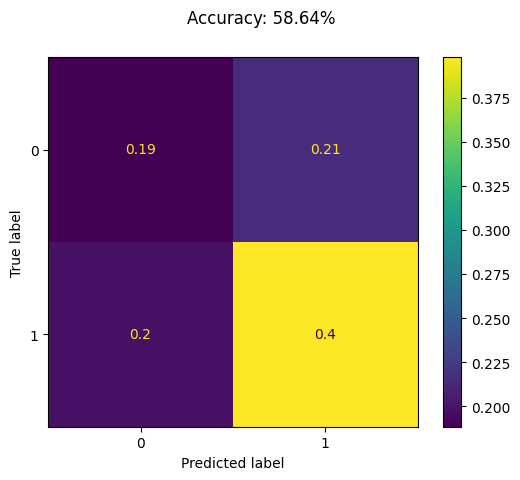

In [ ]:

# Let's prevent it from getting that complex
clf_with_tuning = DecisionTreeClassifier(random_state=42, max_depth=4)
clf_with_tuning.fit(X_train, y_train)
predictions_dt_with_tuning = clf_with_tuning.predict(X_test)

# Look at that, it increases in accuracy with our limiting of it?
get_accuracy(predictions_dt_with_tuning)

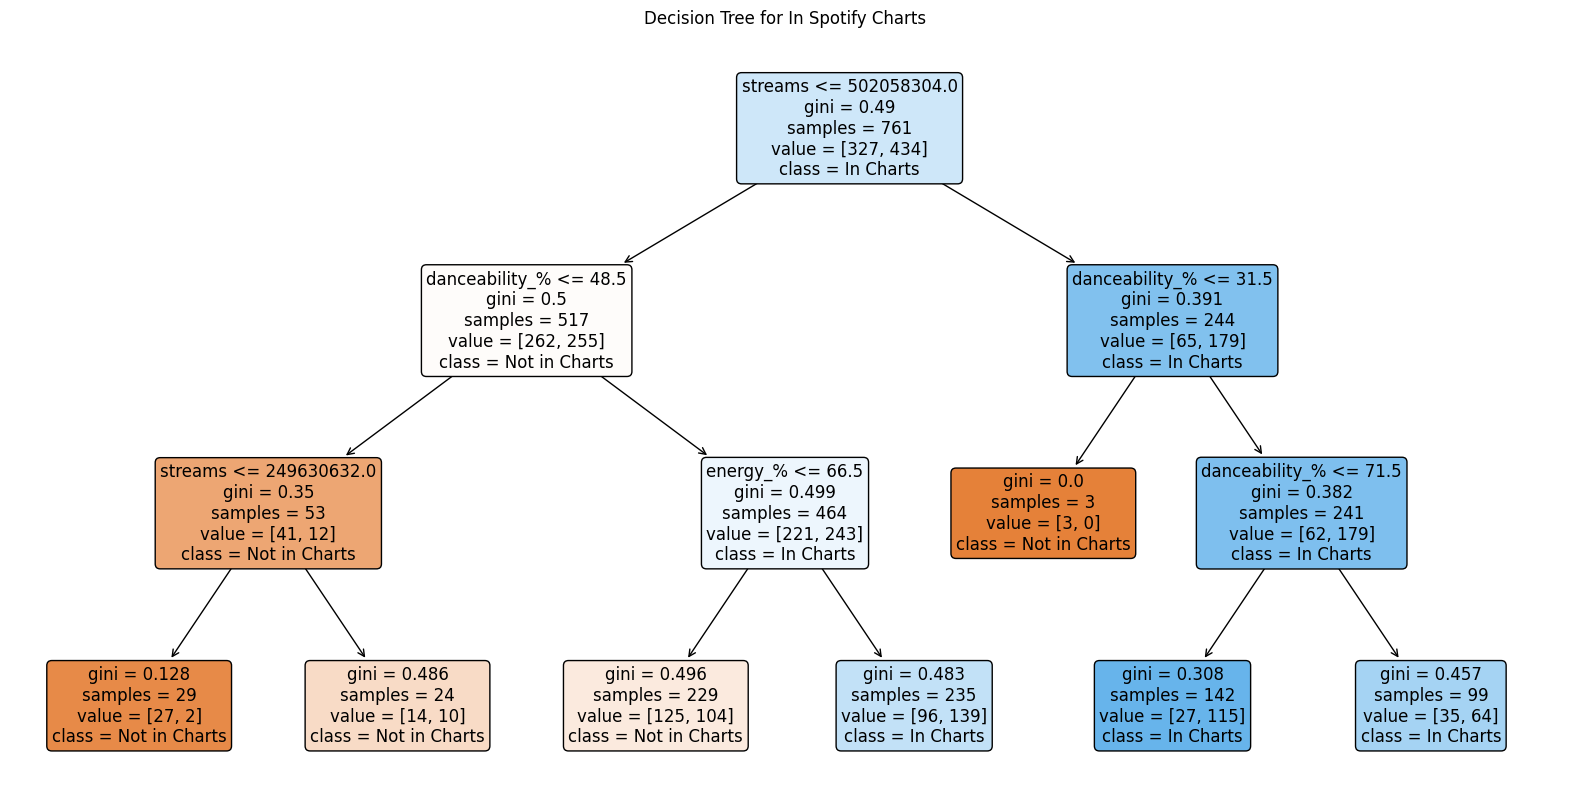

In [ ]:
#fit the decision tree model with the same features and target
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=3)
decision_tree.fit(X_train, y_train)

# Plotting the decision tree
plt.figure(figsize=(20,10), facecolor='white')
tree.plot_tree(decision_tree, filled=True, feature_names=features.columns, class_names=['Not in Charts', 'In Charts'], rounded=True, fontsize=12)
plt.title('Decision Tree for In Spotify Charts')
plt.show()